<img src="https://github.com/imedinam50/MCDI/blob/main/MLAppStore.png?raw=true">

<div style="text-align: right"> <H1> Reliable Credit Score </H1></div>

<br>

<H2><I> Creator: Ismael Medina Muñoz </I></H2>

<div style="text-align: right"> Fecha de entrega: 2022-09-23 </div>

# Introduction
This is the experiment to create a "model-ready to sell" for the MLAppStore. This is based on (S. Arya, C. Eckel, & W. Colin. 2013) paper related to the anatomy of the Credit Score.

This experiment will contain the development of Exploratory Data Analysis, Statistical Analysis, Dimentional Reduction and ML model training.

Experiment dataset comes from **[Statlog (German Credit Data) Data Set](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))**

# Synopsis of the reading *"Anatomy of the Credit Score"*

The document states that credit scoring is correlated with impulsiveness, time preference, and integrity.
The process of granting credit is done through a rating provided by the *Fair Isaac Corporation (FICO)* with an algorithm that is still secret, but of which there are indications of its implementation.

A credit debtor has a payment behavior influenced by 2 factors:

1. Credit payment capacity
2. The debtor's choice to pay or not

The study establishes different factors that were analyzed regarding the behavior of credit applicants:

1. Impatience. Associated with consumption in the present due to debt, where a large debt implies a greater probability of default.
2. Impulsivity. Little debt resistance for current consumption and a propensity to default on debts.
3. Risk Tolerance. The accumulation of debt due to risk and the subsequent difficulty of payment.
4. Integrity. Poor integrity implies failure to meet your debt obligations.

The investigation and the procedure that was followed was based on the following measurements:
  1. Credit rating. Using the online estimator www.myfico.com
  2. Impulsivity. Using the interview on the Barratt Impulsiveness Scale (BIS-11) that describes the following subcomponents:\
     2.1. Attention\
     2.2. Engine\
     2.3. self-control\
     2.4. Cognitive complexity\
     2.5. Perseverance\
     2.6. cognitive instability
  3. Risk preferences. Using the measure proposed by Eckel and Grossman (2008)
  4. Time preferences. Using the variance measure in the 'multiple price list'
  5. Integrity. Using the Confidence Game Tasks (Berg, Dickaut, and McCabe)
 
The experiment was explained with experimental dollars and the tasks were randomly chosen to receive a real payment with a conversion rate of 1 experimental dollar to 50 US cents.

The exercise was carried out with 79 subjects of working age and having a credit history. Of those, only 66 responded and 3 samples with extreme values were eliminated.

The experiment was electronic with the surveys programmed in z-tree. The order of the experiment was:
1. Financial survey
2. Impulsivity survey
3. Trust game task
4. Gambling
5. Time Preference Game

The proposed hypothesis was:
<div class="alert alert-block alert-info">
    
**Patience** (opposite of impatience) is positively correlated with the FICO score and is described as the propensity to avoid current consumption with credit to obtain a better level of well-being in the future, it also implies better analysis of interests and expenses that facilitate the credit payment.

**impulsivity** is negatively correlated with a FICO score.

The **risk preference** indicates that someone who does not take credit risks has a better credit rating.

**Integrity** is positively correlated with the FICO Score.

**income** is an important control variable. A high income correlates directly with a higher FICO score.
</div>

The results corroborated that there is a correlation of the credit rating with impulsiveness, time preference and the applicant's integrity.

# Experiment development
## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from scipy.stats import norm

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

C:\Users\ismedina\Anaconda3\envs\Hackaton2022\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Los datos origen están codificados y sin nombres descriptivos de columnas. En el siguiente código se hará la descripción de las columnas para la carga del dataframe y con esto tendremos más claro el propósito de cada columna

In [2]:
german_data_path = "./german.data"

column_names = ['CheckingAccountStatus', 'DurationInMonths', 'CreditHistory',
                'Purpose', 'CreditAmount', 'SavingsAccount', 'PresentEmplSince', 
                'InstallmentRate', 'PersonalStatusAndSex', 'Guarantors',
                'PresentResidenceSince', 'Property', 'AgeYears',
                'OtherInstallmentPlans', 'Housing', 'ExistingCreditCards',
                'Job', 'LiablePeople', 'HasPhone', 'ForeignWorker']

german_data = pd.read_csv(german_data_path, sep= " ", names = column_names, index_col = False)

C:\Users\ismedina\AppData\Local\Temp\ipykernel_24228\716400850.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  german_data = pd.read_csv(german_data_path, sep= " ", names = column_names, index_col = False)


In [3]:
german_data.head()

,CheckingAccountStatus,DurationInMonths,CreditHistory,Purpose,CreditAmount,SavingsAccount,PresentEmplSince,InstallmentRate,PersonalStatusAndSex,Guarantors,PresentResidenceSince,Property,AgeYears,OtherInstallmentPlans,Housing,ExistingCreditCards,Job,LiablePeople,HasPhone,ForeignWorker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
german_data.dtypes

CheckingAccountStatus    object
DurationInMonths          int64
CreditHistory            object
Purpose                  object
CreditAmount              int64
SavingsAccount           object
PresentEmplSince         object
InstallmentRate           int64
PersonalStatusAndSex     object
Guarantors               object
PresentResidenceSince     int64
Property                 object
AgeYears                  int64
OtherInstallmentPlans    object
Housing                  object
ExistingCreditCards       int64
Job                      object
LiablePeople              int64
HasPhone                 object
ForeignWorker            object
dtype: object

To identify whether the behavior of credit holders regarding their payment habits, we will start by analyzing their credit history.

<AxesSubplot: xlabel='CreditHistory', ylabel='Count'>

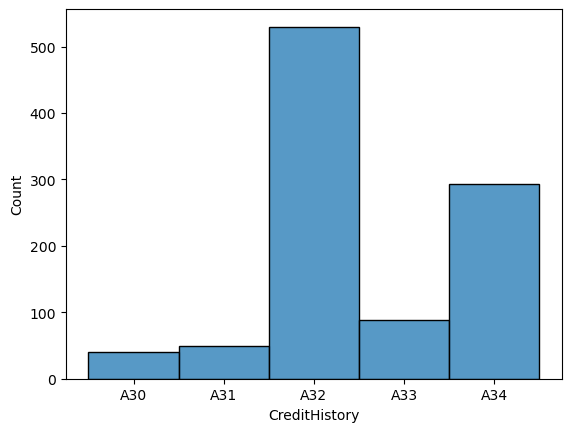

In [5]:
CCreditHistory = {'A30' : 'no credits taken/ all credits paid back duly',
                       'A31' : 'all credits at this bank paid back duly',
                       'A32' : 'existing credits paid back duly till now',
                       'A33' : 'delay in paying off in the past',
                       'A34' : 'critical account/ other credits existing (not at this bank)'}

sns.histplot(german_data['CreditHistory'].sort_values())

It is evident that we are interested in classifying those who have paid and pay their loans on time and separate them from those with delays and critical accounts. For this we are going to generate a new variable that allows encoding whether the subject pays or not. Thus, we can analyze the rest of the data through these 2 perspectives as an initial proposal for exploratory data analysis.

In [6]:
german_data['WillPay'] = 0

german_data.loc[german_data.CreditHistory.isin(['A30', 'A31', 'A32']), 'WillPay'] = 1

In [7]:
german_data

,CheckingAccountStatus,DurationInMonths,CreditHistory,Purpose,CreditAmount,SavingsAccount,PresentEmplSince,InstallmentRate,PersonalStatusAndSex,Guarantors,...,Property,AgeYears,OtherInstallmentPlans,Housing,ExistingCreditCards,Job,LiablePeople,HasPhone,ForeignWorker,WillPay
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


<AxesSubplot: xlabel='WillPay', ylabel='Count'>

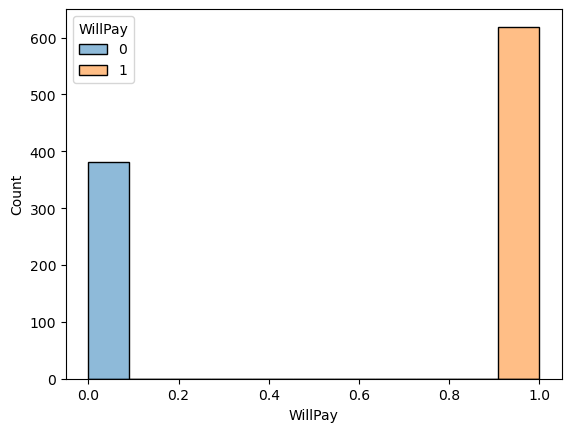

In [8]:
sns.histplot(data = german_data, x = 'WillPay', hue = 'WillPay')

<AxesSubplot: xlabel='CheckingAccountStatus', ylabel='Count'>

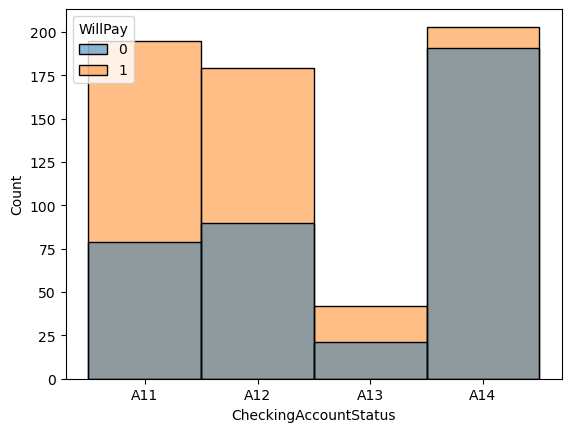

In [9]:
CCheckingAccountStatus = {'A11' : '< 0 DM',
                         'A12' : '0 <= DM < 200',
                         'A13' : ' DM >= 200',
                         'A14' : 'NO ACCOUNT'}

sns.histplot(data = german_data.sort_values(by='CheckingAccountStatus'), 
             x = 'CheckingAccountStatus', hue='WillPay')

It is well known that those who least comply with the payment of credits are those who do not have an account with this bank. This behavior could not be explained by the fact that we do not have a history of that person in this bank. All this would have to be verified statistically by reviewing other columns or collecting more data. This will then be determined later.

Meanwhile, we can review the rest of the categorical data in histograms that give us indications of the behavior of credit holders divided between those who pay and those who do not.

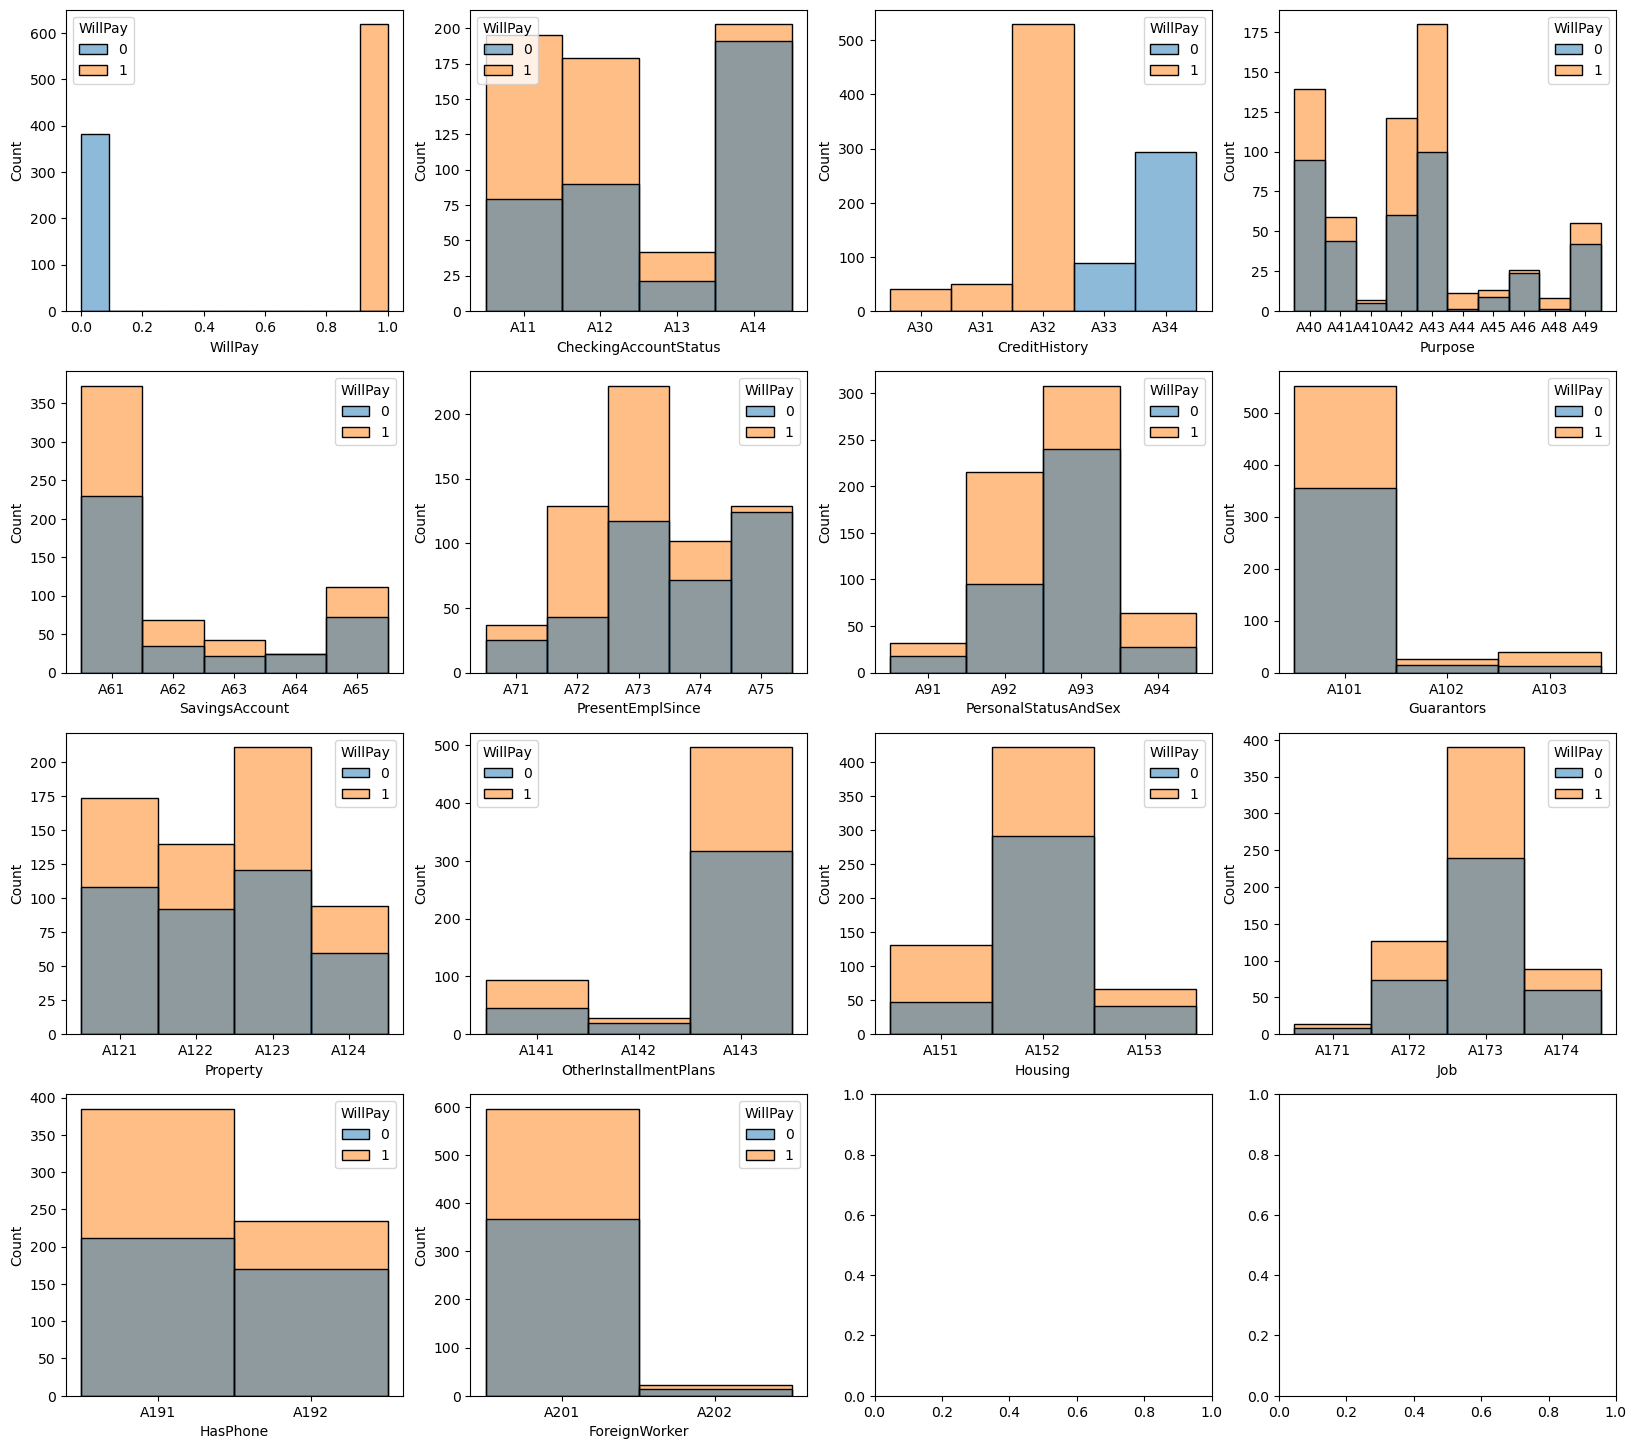

In [10]:
categorical_column_names = ('WillPay', 'CheckingAccountStatus', 
                'CreditHistory', 'Purpose', 'SavingsAccount', 
                'PresentEmplSince', 'PersonalStatusAndSex', 'Guarantors',
                'Property', 'OtherInstallmentPlans', 'Housing',
                'Job', 'HasPhone', 'ForeignWorker')

columns = 4
rows = math.ceil(len(categorical_column_names) / columns)

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(20, 18))

i = 0
j = 0
    
for col in categorical_column_names:
    sns.histplot(german_data.sort_values(by=col), x = col, hue = 'WillPay', ax = axes[i][j])
    
    j += 1
    if j > columns - 1:
        i += 1
        j = 0

Now we will review the rest of the numerical data in kernel density estimation plots that give us indications of the behavior of credit holders divided between those who pay and those who do not.

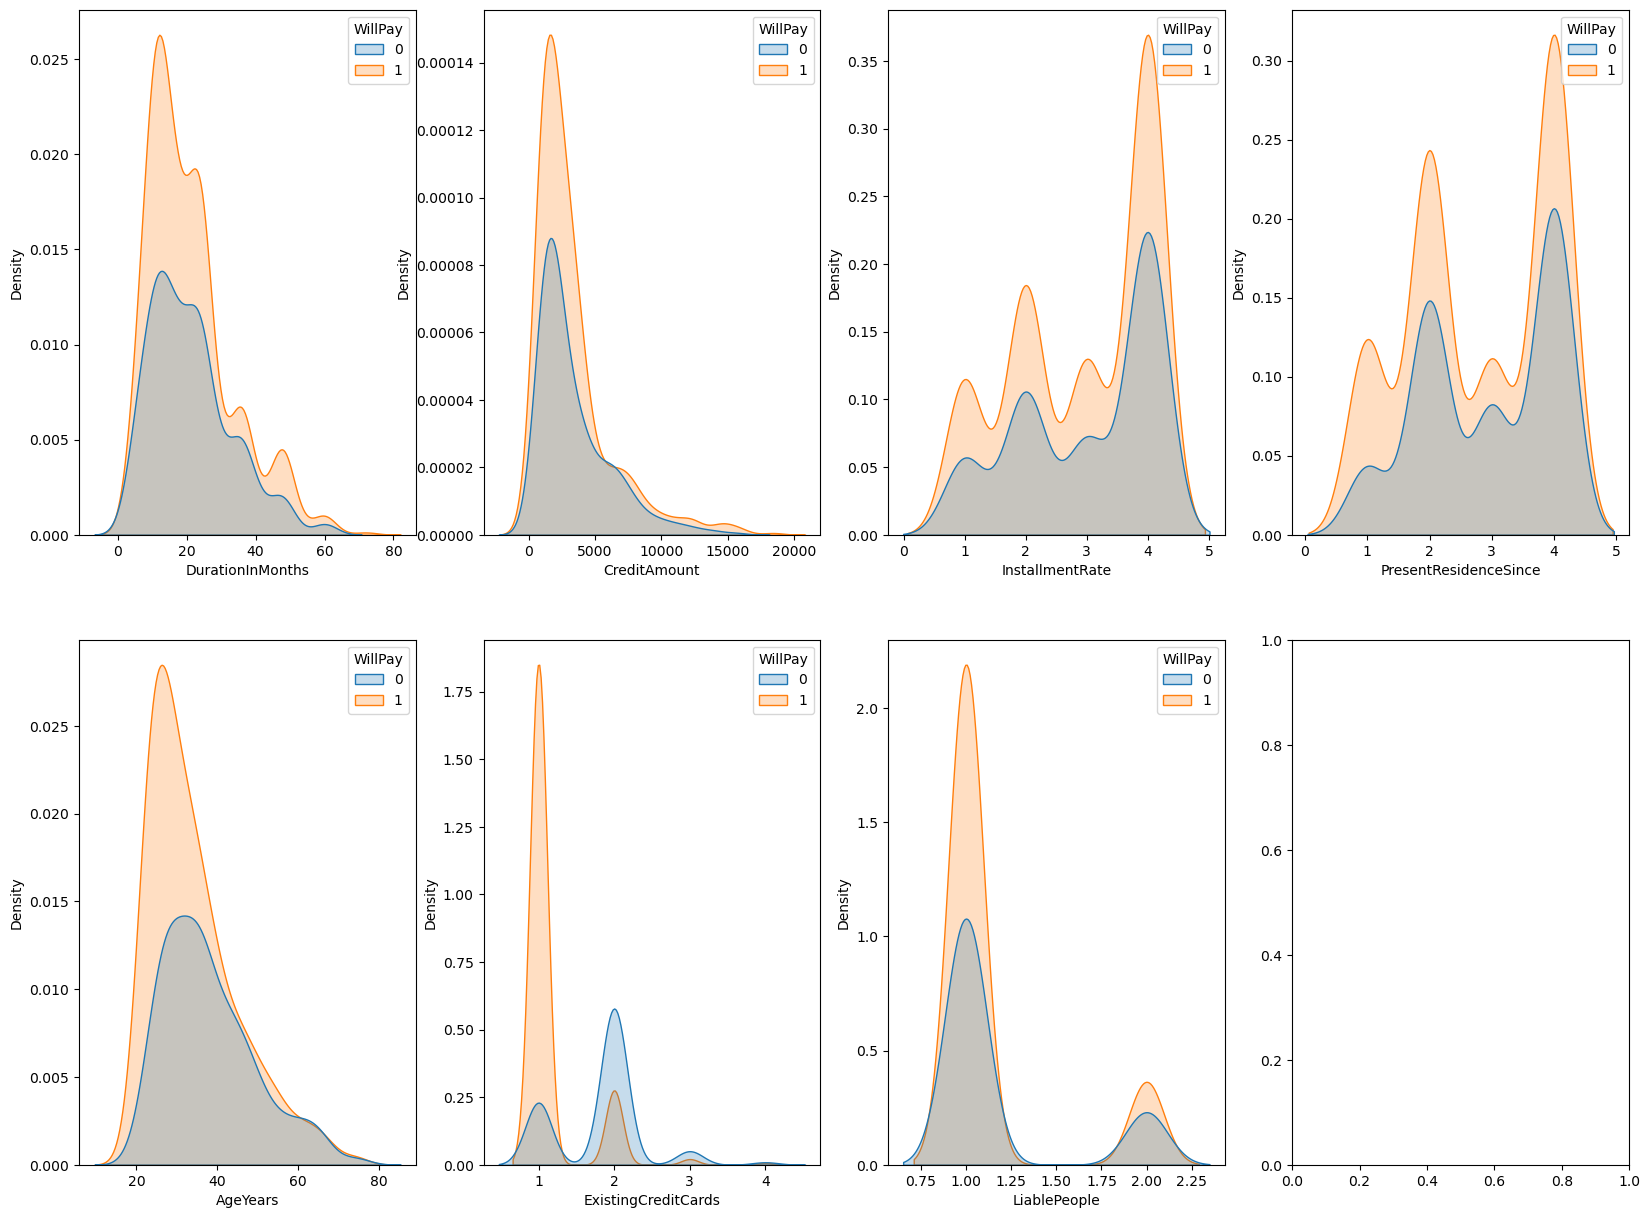

In [11]:
numerical_column_names = ('DurationInMonths', 'CreditAmount', 'InstallmentRate', 
'PresentResidenceSince', 'AgeYears', 'ExistingCreditCards',
'LiablePeople')

columns = 4
rows = math.ceil(len(numerical_column_names) / columns)

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(20, 15))

i = 0
j = 0
    
for col in numerical_column_names:
    ##for cumple in range (0, 2): ## Casos 0 y 1 de cumplimiento
    sns.kdeplot(data = german_data, x = col,
                fill = True, ax = axes[i][j], hue='WillPay', multiple='layer')
    
    j += 1
    if j > columns - 1:
        i += 1
        j = 0

Up to this point we can theorize the following about the owner of the credit:

* **CheckingAccountStatus** of type _A14_ indicates an unreliable debtor for payments.
* **Purpose** of type _A410_, _A45_, _A46_ and _A49_ add more unreliable debtors.
* **SavingsAccount** of type _A64_ describes a debtor that is not very reliable for payments.
* **PresentEmplSince** of type _A71_, _A74_ and _A75_ describe a debtor with little reliability for payments.
* **PersonalStatusAndSex** of type _A91_ and _A93_ describe a debtor who is not very reliable for payments.
* **Guarantors** of type _A101_ describes a less reliable debtor for payments.
* **Property** of type _A121_, _A122_, _A124_ describe a debtor who is not very reliable for payments.
* **OtherInstallmentPlans** of type _A142_ and _A143_ describe a less reliable debtor for payments.
* **Housing** of type _A152_ and _A153_ describe a debtor with little reliability for payments.
* **Job** of type _A171_, _A172_ and _A174_ describe a debtor who is not very reliable for payments.
* **HasPhone** of the type _A192_ describes us an unreliable debtor for payments.
* **ForeignWorker** of type _A202_ describes a debtor who is not very reliable for payments.
* **DurationInMonths** does not seem relevant to describe the debtor.
* **CreditAmount** does not seem relevant to describe the debtor.
* **InstallmentRate** does not seem relevant to describe the debtor.
* **PresentResidenceSince** seems to indicate that people with one year in the home describe us as a more reliable debtor for payments than those who have more time.
* **AgeYears** shows that we have the same amount of compliant and non-compliant debtors between 60 and 80, but between 20 and 40 debtors are more compliant with the credit.
* **ExistingCreditCards** indicates that people with only one card are better payers.
* **LiablePeople** in a low amount indicate that the owner of the credit is a better payer.

We are going to reduce dimensionality to identify if there is any clear linear separation between the types of credit owners.

## Dimensionality reduction and linear separation of classes
In the code below, we experimented with dimension reduction in order to identify a possible linear separation. We start with the encoding of labels where there is no ordinal position in order to have a data set suitable for PCA.

In [12]:
categorical_column_names = ('WillPay', 'CheckingAccountStatus', 
                'CreditHistory', 'Purpose', 'SavingsAccount', 
                'PresentEmplSince', 'PersonalStatusAndSex', 'Guarantors',
                'Property', 'OtherInstallmentPlans', 'Housing',
                'Job', 'HasPhone', 'ForeignWorker')

label_encoder = LabelEncoder()

german_data_encoded = german_data.copy()

for col in categorical_column_names:
    german_data_encoded[col] = label_encoder.fit_transform(german_data[col])

german_data_encoded.head()

,CheckingAccountStatus,DurationInMonths,CreditHistory,Purpose,CreditAmount,SavingsAccount,PresentEmplSince,InstallmentRate,PersonalStatusAndSex,Guarantors,...,Property,AgeYears,OtherInstallmentPlans,Housing,ExistingCreditCards,Job,LiablePeople,HasPhone,ForeignWorker,WillPay
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,0


### Dimension reduction by PCA

In [13]:
def plotClusters(data,labels,centroids={},f="",centroids_txt_labels={}):
    fig=plt.figure(figsize=(10, 10))
    sbox = dict(boxstyle='round', facecolor='white', alpha=0.4)
    d=len(data[1])
    if d==3:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)
    K=np.unique(labels)
    color_map=iter(cm.viridis(np.linspace(0,1,len(K))))
    for k in K:
        D=data[np.where(labels==k)]
        x,y=D[:,0],D[:,1]
        cl=next(color_map)
        if d==3:
            z=D[:,2]
            ax.scatter(x,y,z, color=cl,s=32)
        else:
            ax.scatter(x,y, color=cl,s=32)
        if len(centroids):
            txt_label=centroids_txt_labels and str(centroids_txt_labels[k]) or str(k)
            if len(centroids[k])==3:
                xc,yc,zc=centroids[k]
                ax.text(xc,yc,zc,txt_label,bbox=sbox,fontsize=14)
            else:
                xc,yc=centroids[k]
                ax.text(xc,yc,txt_label,bbox=sbox,fontsize=14)
    if len(data[0])==3:
        ax.set_zticks([])
    ax.set_xticks([])
    ax.set_yticks([])
    if f:
        fig.savefig(f)

In [14]:
def plotPCA(data, labels, d=2,f="",centroids={},vectors=True):
    pca = PCA(n_components=d)
    pca.fit(data)
    X=pca.transform(data)
    origin2d=[0],[0]
    origin3d=[0],[0],[0]
    pca_centroids={}
    for k,c in centroids.items():
        pca_centroids[k]=pca.transform([centroids[k]])[0,:]
    plotClusters(X,labels,f=f,centroids=pca_centroids)
    if len(centroids)>0 and vectors:
        for k,c in pca_centroids.items():
            if d==2:
                plt.quiver(*origin2d, pca_centroids[k][0],pca_centroids[k][1],angles='xy',
                        scale_units='xy', scale=1, color='skyblue')
            else: 
                plt.quiver(*origin3d, pca_centroids[k][0],pca_centroids[k][1],pca_centroids[k][2],color='skyblue')

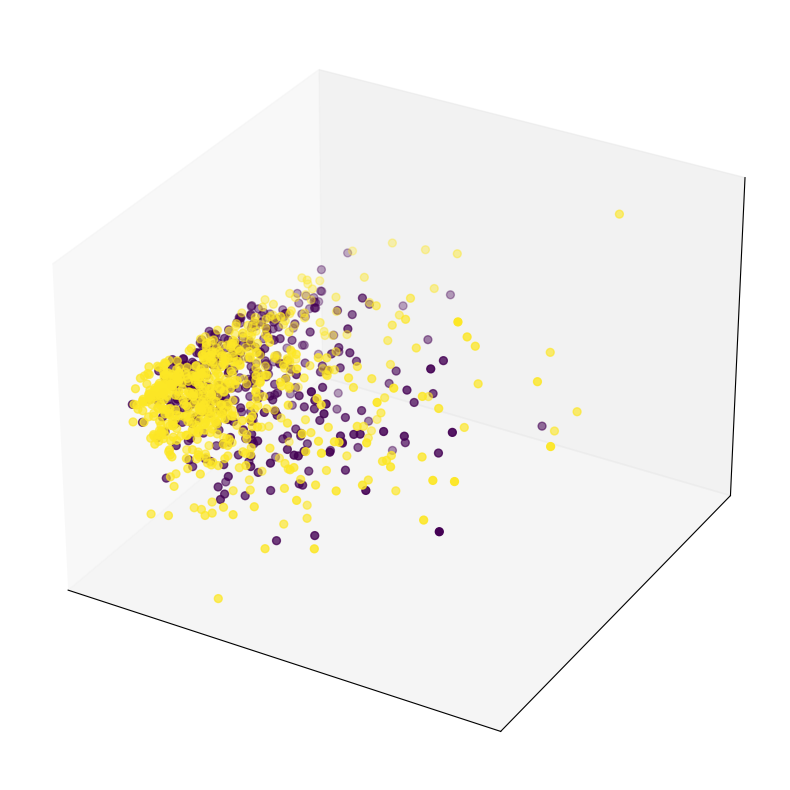

In [15]:
plotPCA(german_data_encoded, german_data_encoded.WillPay, d=3, f="", vectors=True)

It is not clear in 3 dimensions that we have a linear separation of classes, this could indicate to us that linear methods will not perform well as a computational learning method that allows us to analyze requests for new credits that allow us to have greater certainty of payment.
As an alternative to the above encoding, the implementation with OneHotEncoding is shown in the code below.

In [16]:
categorical_column_names = ('CheckingAccountStatus', 
                'CreditHistory', 'Purpose', 'SavingsAccount', 
                'PresentEmplSince', 'PersonalStatusAndSex', 'Guarantors',
                'Property', 'OtherInstallmentPlans', 'Housing',
                'Job', 'HasPhone', 'ForeignWorker')

numerical_column_names = ('DurationInMonths', 'CreditAmount', 'InstallmentRate', 
'PresentResidenceSince', 'AgeYears', 'ExistingCreditCards',
'LiablePeople')

oh_encoder = OneHotEncoder()

german_data_encoded = pd.DataFrame()
german_data_encoded.index = german_data.index

for col in categorical_column_names:
    german_col_encoded = pd.DataFrame(oh_encoder.fit_transform(german_data[[col]]).toarray())
    german_col_encoded.columns = oh_encoder.get_feature_names_out([col])
    german_data_encoded = german_data_encoded.join(german_col_encoded)
    
for col in numerical_column_names:
    german_data_encoded = german_data_encoded.join(german_data[col])

german_data_encoded

,CheckingAccountStatus_A11,CheckingAccountStatus_A12,CheckingAccountStatus_A13,CheckingAccountStatus_A14,CreditHistory_A30,CreditHistory_A31,CreditHistory_A32,CreditHistory_A33,CreditHistory_A34,Purpose_A40,...,HasPhone_A192,ForeignWorker_A201,ForeignWorker_A202,DurationInMonths,CreditAmount,InstallmentRate,PresentResidenceSince,AgeYears,ExistingCreditCards,LiablePeople
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,6,1169,4,4,67,2,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,48,5951,2,2,22,1,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,12,2096,2,3,49,1,2
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,42,7882,2,4,45,1,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12,1736,3,4,31,1,1
996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,30,3857,4,4,40,1,1
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12,804,4,4,38,1,1
998,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,45,1845,4,4,23,1,1


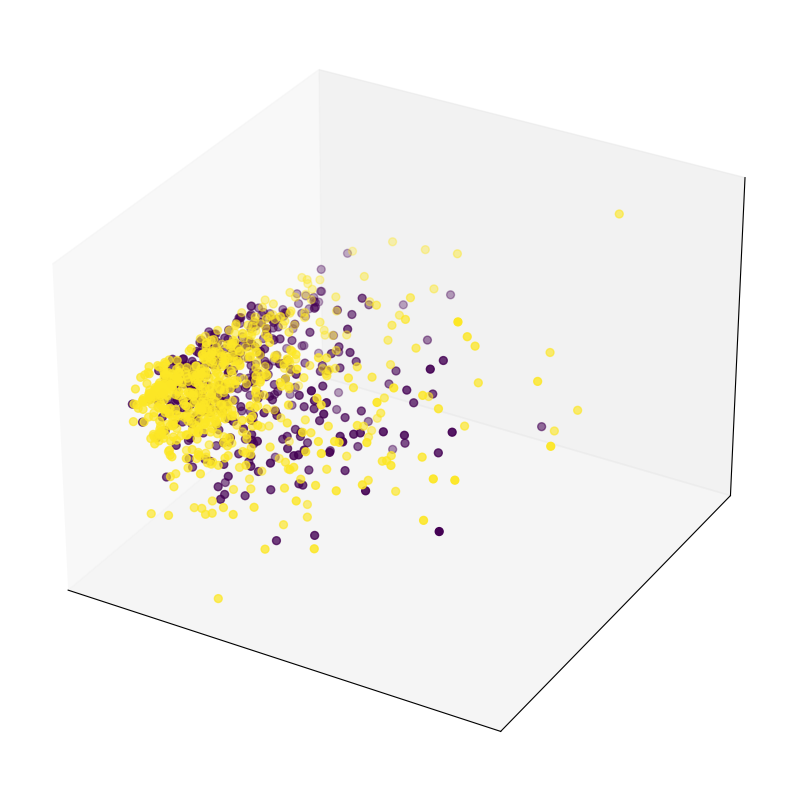

In [17]:
plotPCA(german_data_encoded, german_data['WillPay'], d=3, f="", vectors=True)

### Dimension reduction by t-SNE as a non-linear method of class separation

In [18]:
dfT_1_2 = TSNE(n_components = 2).fit_transform(german_data_encoded)

C:\Users\ismedina\Anaconda3\envs\Hackaton2022\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ismedina\Anaconda3\envs\Hackaton2022\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


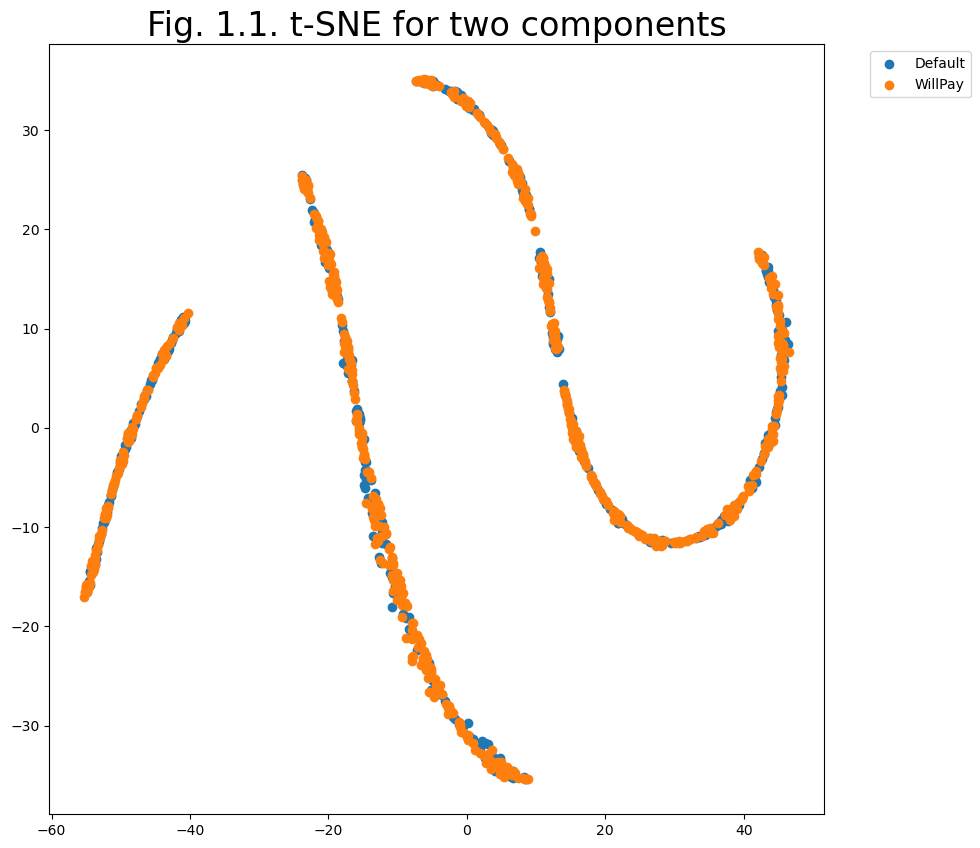

In [19]:
plt.rcParams["figure.figsize"]=10, 10
plt.title("Fig. 1.1. t-SNE for two components", fontsize=24)

plt.rcParams["figure.figsize"]=10, 10
clases = ['Default', 'WillPay']

yi = german_data['WillPay']

for l in set(yi):
    idx=np.where(yi==l)
    plt.scatter(dfT_1_2[:,0][idx],dfT_1_2[:,1][idx],c=f'C{l}', 
                label=clases[l])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

At this point it is not possible to identify a class separation, that is why we will do the same exercise, but with 3 dimensions in order to manipulate the projection.

In [20]:
dfT_1_1 = TSNE(n_components = 3).fit_transform(german_data_encoded)

C:\Users\ismedina\Anaconda3\envs\Hackaton2022\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ismedina\Anaconda3\envs\Hackaton2022\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


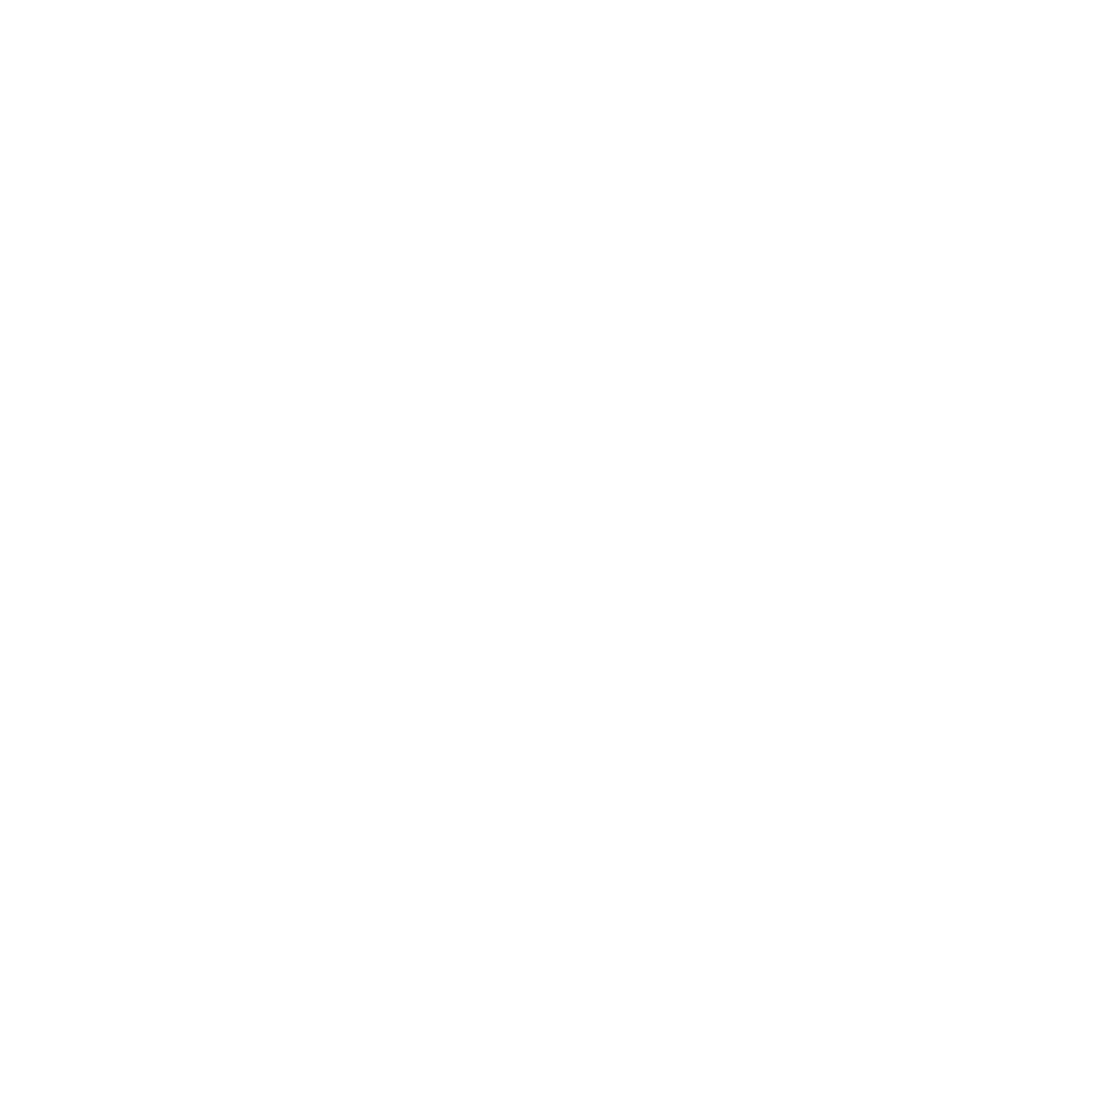

In [21]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.rcParams["figure.figsize"]=10, 10
plt.title("Fig. 1.3. t-SNE for 3 components", fontsize=24)

for l in set(yi):
    idx=np.where(yi==l)
    ax.scatter(dfT_1_1[:,0][idx],dfT_1_1[:,1][idx], dfT_1_1[:,2][idx], c=f'C{l}', label = clases[l])

ax.grid()
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend()

##plt.show()
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

After having the projection in 3 dimensions it is not clear if there is a separation of classes. At this point it is perhaps better to proceed to obtain a computational learning model that allows us to define the importance of features.

## Implementation of machine learning methods

## Create the training set
For the present experiment, it was defined to use a set of tests with 20% of the information. The training set will be subjected to K-Folds segmentation to help us identify a model that is not very sensitive to the variability of the data set.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    german_data_encoded, german_data['WillPay'], test_size=0.2)

Taking Ferreira's (2018) Kaggle code as a reference, a set of models was trained from which one of the best `accuracy` metrics described us and whose computational cost was the lowest. It was decided to use `accuracy` as a performance measure to compare the models since we are interested in the correct classification of credit applicants as prospects who make good payments or who will not fulfill that responsibility.

In [23]:
# to feed the random state
seed = 5

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter = 10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(('MLP', MLPClassifier(random_state=seed, max_iter=300)))

# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 1.000000 (0.000000)
LDA: 0.818750 (0.049765)
KNN: 0.566250 (0.044035)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
SVM: 0.590000 (0.046030)
XGB: 1.000000 (0.000000)
MLP: 0.705000 (0.148661)


The performance of the models with 10 folds was recorded for each experiment and the mean value of `accuracy` and its standard deviation were plotted to compare performances.

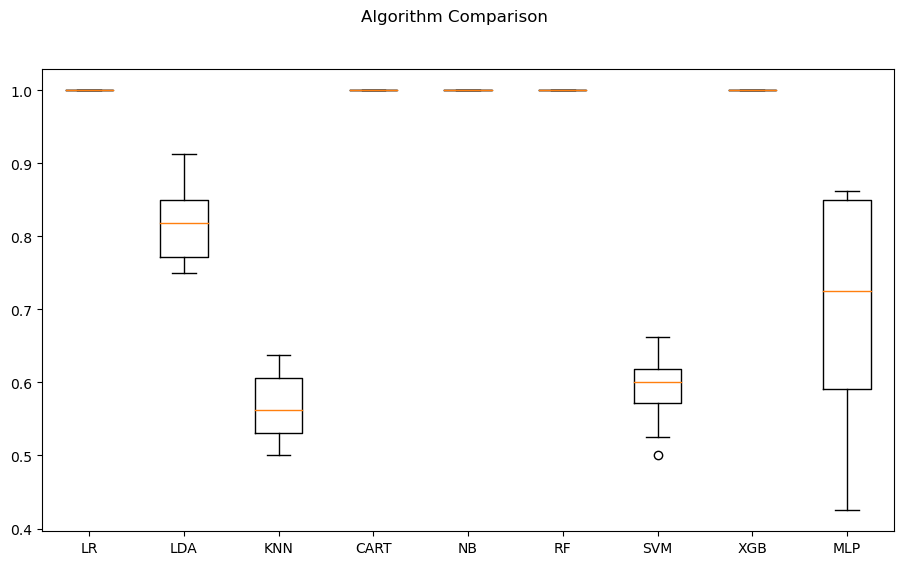

In [24]:
%matplotlib inline
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig("c:\\users\\ismedina\\pictures\\Comparison.png")
plt.show()


It seems that a simple logistic regression fulfills the objective adequately. With this model we are then going to run the singular training to obtain performance measures that can be used in an executive presentation. In this way, there would be a sponsorship to implement the model as a service that can be consumed by business systems to improve the granting of credit and increase its recovery rate.

In [25]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

1.0


In [26]:
predictions = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 74   0]
 [  0 126]]


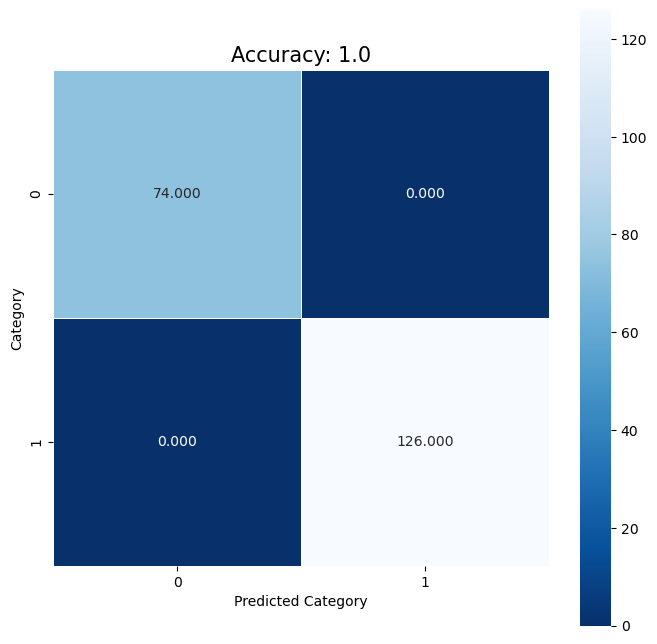

In [27]:
%matplotlib inline
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Category');
plt.xlabel('Predicted Category');
all_sample_title = 'Accuracy: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The confusion matrix has the elements that could have a high visual impact and with it the sponsorship required to continue with the deployment could be obtained. On the other hand, sharing the finding with other data scientists through the vector of coefficients $\beta$ would be a good way to start explaining the experiment.

In [28]:
model.intercept_

array([0.40755577])

In [29]:
model.coef_

array([[ 3.13324379e-01,  7.30720417e-02,  6.71145021e-02,
        -2.08649094e-01,  2.03630901e+00,  1.80403278e+00,
         4.05779923e+00, -3.46742954e+00, -4.18584965e+00,
        -1.63100777e-02,  1.51388529e-01, -1.92918060e-02,
         1.67301043e-03, -1.80227354e-01,  8.32895971e-02,
         1.22581689e-01, -2.57479972e-01,  1.29607976e-01,
         2.29630237e-01,  1.82909567e-02,  1.75406540e-01,
         1.33752586e-01,  6.20550743e-02, -1.44643328e-01,
         1.38009257e-01,  1.08180949e-01,  1.58686032e-01,
        -1.43596636e-01, -1.64177730e-02, -7.10197767e-03,
         2.64511082e-01, -3.39294596e-02,  2.13821842e-02,
         2.69921071e-04, -1.24489855e-02,  2.57040893e-01,
         3.41918630e-02, -1.24132524e-02,  1.20895042e-01,
         1.02188176e-01,  3.14863556e-01,  4.86169751e-02,
        -1.18618702e-01,  2.22555315e-01, -1.65097797e-02,
         3.88162936e-02,  1.23717806e-01,  2.80872471e-02,
         5.98658625e-02,  3.31909127e-02,  2.88373516e-0

## Model to PKL file

In [30]:
import pickle

with open("CreditScore001.pkl", "wb") as f:
    pickle.dump(model, f)

# References

* Arya, Shweta and Eckel, Catherine and Colin, Wichman (2013): Anatomy of the Credit Score. Published in: Journal of Economic Behavior and Organization , Vol. 95, (November 2013): pp. 175-185.
* Ferreira, Leonardo (2018). Predicting Credit Risk - Model Pipeline. https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline, (November 2018). Visited on 2022-02-12.